In [1]:
from LSTM_trainer import *
from models.conditionalLSTM import ConditionalAttn
from data.data import get_dataloader_LSTM
from LSTM_trainer import flat_accuracy, trainer

There are 1 GPU(s) available.
We will use the GPU: Tesla M40 24GB


In [2]:
data_file = "combine_balanced.csv"
BATCH = 32
MAX_LEN = 128
EPOCHS = 15
EARLY_STOP = 2
LR = 5e-5
# LR = 5e-6
# WD = 1e-2
WD = 1e-3
# WD = 1e-4
EPS = 1e-8

In [3]:
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

In [4]:
train_dataloader, validation_dataloader = get_dataloader_LSTM(tokenizer, data_file, BATCH, MAX_LEN)

loading data ...


  1%|          | 602/101082 [00:00<00:34, 2899.87it/s]

Encoding sentences ...


100%|██████████| 101082/101082 [00:26<00:00, 3768.51it/s]


Get dataloader ...
torch.Size([101082, 128])
torch.Size([101082, 128])
101082
75811 25271
2370 790


In [5]:
from torch.optim.lr_scheduler import StepLR

classifier = ConditionalAttn(embedding_dim=768, hidden_dim=128, num_layers=1, label_size=2)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    # Filter for all parameters which *don't* include 'bias', 'gamma', 'beta'.
    {'params': [p for n, p in classifier.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': WD},
            
    # Filter for parameters which *do* include those.
    {'params': [p for n, p in classifier.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}]

optimizer = AdamW(optimizer_grouped_parameters, lr = LR, eps = EPS)

total_steps = len(train_dataloader)

# Create the learning rate scheduler.
# scheduler = get_linear_schedule_with_warmup(optimizer, 
#                                             num_warmup_steps = 0, # Default value in run_glue.py
#                                             num_training_steps = total_steps)
scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95)

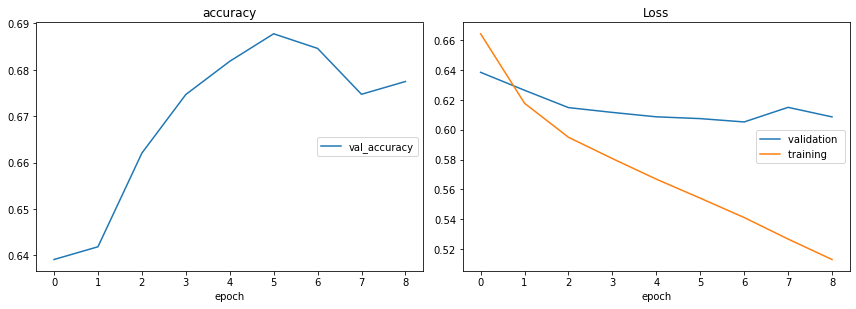

accuracy
	val_accuracy     	 (min:    0.639, max:    0.688, cur:    0.677)
Loss
	validation       	 (min:    0.605, max:    0.638, cur:    0.609)
	training         	 (min:    0.513, max:    0.664, cur:    0.513)
early_stopping, epoch: 9
Final dev loss 48.078842 Final Train Loss 121.611680 Final dev accuracy 0.677483
Best dev loss 47.811356 Best dev accuracy 0.684616
F1_score Sarcasm  (0.6836820083682008, 0.6515151515151515, 0.6672111065741119, None)
F1_score Non-Sarcasm  (0.6719219219219219, 0.7030636292223095, 0.6871401151631478, None)


In [6]:
# scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95) PairAttnLSTM
classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader, "check.pt")

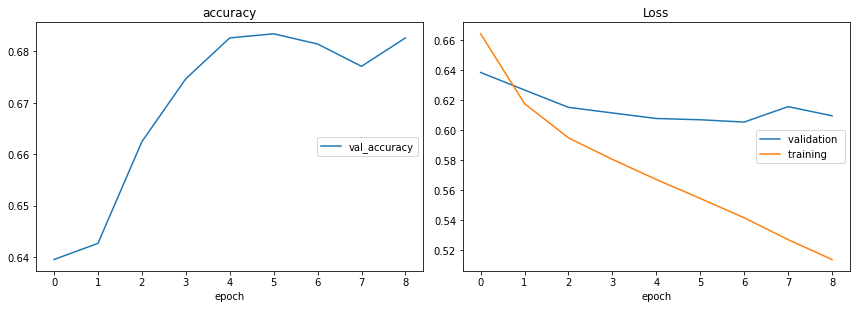

accuracy
	val_accuracy     	 (min:    0.640, max:    0.683, cur:    0.683)
Loss
	validation       	 (min:    0.605, max:    0.638, cur:    0.610)
	training         	 (min:    0.514, max:    0.664, cur:    0.514)
early_stopping, epoch: 9
Final dev loss 48.162002 Final Train Loss 121.783199 Final dev accuracy 0.682626
Best dev loss 47.829621 Best dev accuracy 0.681439
F1_score Sarcasm  (0.6819645732689211, 0.6754385964912281, 0.6786858974358975, None)
F1_score Non-Sarcasm  (0.6832684824902724, 0.6897093479968578, 0.6864738076622361, None)


In [6]:
# scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95) ConditionalEncoding
classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader, "check.pt")

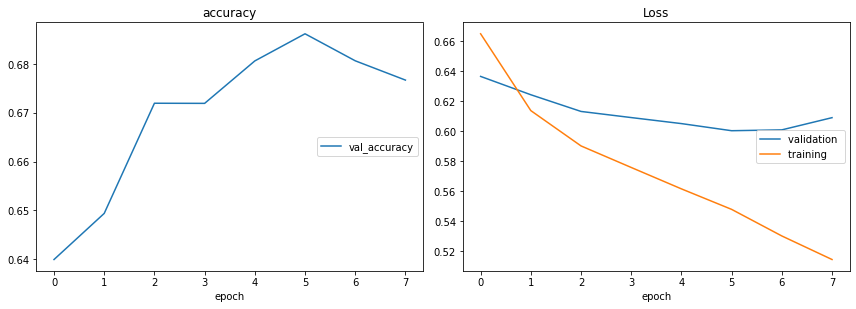

accuracy
	val_accuracy     	 (min:    0.640, max:    0.686, cur:    0.677)
Loss
	validation       	 (min:    0.600, max:    0.636, cur:    0.609)
	training         	 (min:    0.514, max:    0.665, cur:    0.514)
early_stopping, epoch: 8
Final dev loss 48.101993 Final Train Loss 121.907935 Final dev accuracy 0.676692
Best dev loss 47.414910 Best dev accuracy 0.686186
F1_score Sarcasm  (0.7161226508407518, 0.5773524720893142, 0.6392935982339956, None)
F1_score Non-Sarcasm  (0.6503957783641161, 0.7745483110761979, 0.7070634636070277, None)


In [6]:
# scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95) ConditionalAttention
classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader, "check.pt")

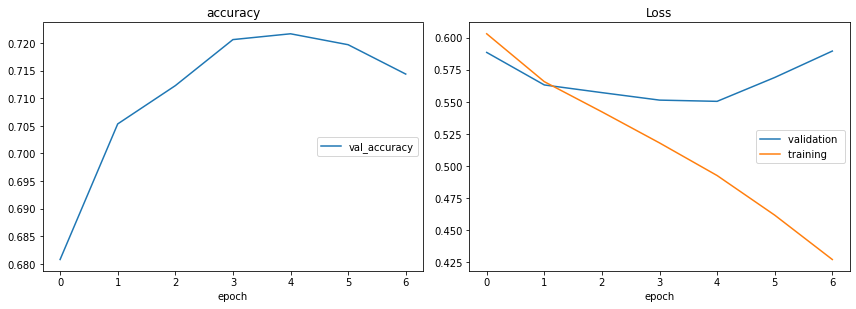

accuracy
	val_accuracy     	 (min:    0.681, max:    0.722, cur:    0.714)
Loss
	validation       	 (min:    0.550, max:    0.590, cur:    0.590)
	training         	 (min:    0.427, max:    0.603, cur:    0.427)
early_stopping, epoch: 7
Final dev loss 465.795401 Final Train Loss 1011.839970 Final dev accuracy 0.714378
Best dev loss 434.797063 Best dev accuracy 0.721672
F1_score Sarcasm  (0.6995576216540451, 0.7440191387559809, 0.721103682807126, None)
F1_score Non-Sarcasm  (0.7310206133735545, 0.6852564606079649, 0.707399148591121, None)


In [6]:
# scheduler = StepLR(optimizer, step_size=total_steps, gamma=0.95) ConditionalAttention
classifier = trainer(classifier, optimizer, scheduler, EPOCHS, EARLY_STOP, train_dataloader, validation_dataloader, "checkpoint_CondAttn.pt")



In [3]:
classifier = ConditionalAttn(embedding_dim=768, hidden_dim=128, num_layers=1, label_size=2)
# classifier.config.classifier_dropout_prob = 0.1
classifier.load_state_dict(torch.load("checkpoint_CondAttn.pt"))
classifier.to(device)
classifier.eval()

ConditionalAttn(
  (LSTM_c): AttnLSTM(
    (lstm): LSTM(768, 128, bidirectional=True)
    (attnLinear): Linear(in_features=256, out_features=128, bias=True)
    (context): Linear(in_features=128, out_features=1, bias=True)
  )
  (LSTM_r): AttnLSTM(
    (lstm): LSTM(768, 128, bidirectional=True)
    (attnLinear): Linear(in_features=256, out_features=128, bias=True)
    (context): Linear(in_features=128, out_features=1, bias=True)
  )
  (attnLinear_c): Linear(in_features=256, out_features=128, bias=True)
  (attnLinear_r): Linear(in_features=256, out_features=128, bias=True)
  (context): Linear(in_features=128, out_features=1, bias=True)
  (proj_c): Linear(in_features=256, out_features=256, bias=True)
  (proj_r): Linear(in_features=256, out_features=256, bias=True)
  (hidden2label): Linear(in_features=256, out_features=2, bias=True)
  (loss_function): CrossEntropyLoss()
)

In [5]:
embedder = AlbertModel.from_pretrained('albert-base-v2')
embedder.to(device)

AlbertModel(
  (embeddings): AlbertEmbeddings(
    (word_embeddings): Embedding(30000, 128, padding_idx=0)
    (position_embeddings): Embedding(512, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0, inplace=False)
  )
  (encoder): AlbertTransformer(
    (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
    (albert_layer_groups): ModuleList(
      (0): AlbertLayerGroup(
        (albert_layers): ModuleList(
          (0): AlbertLayer(
            (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (attention): AlbertAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0, inplace=False)
              (d

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [70]:
def colorize(words, color_array):
    # words is a list of words
    # color_array is an array of numbers between 0 and 1 of length equal to words
    cmap = matplotlib.cm.get_cmap("coolwarm")
    template = '<span class="barcode"; style="color: black; background-color: {}">{}</span>'
    disp_str = "" 
    for word, color in zip(words, color_array):
#         color = matplotlib.colors.rgb2hex(cmap(color)[:3]) 
        disp_str+="<text style='background-color:rgba(0, 60, 255, {});;'>"" {} </text>".format(0.0001+color*0.9999,word)
#         colored_string += template.format(color, '&nbsp' + word + '&nbsp')
    return disp_str

In [91]:
import pandas as pd 

show_n = 1
df = pd.read_csv("full_combine_balanced.csv")
chosen_idx = np.random.choice(len(df), replace=False, size=show_n)
df_trimmed = df.iloc[chosen_idx]
sentences = []

for i, row in df_trimmed.iterrows():
    p = row["parent_comment"]
    r = row["comment"]
    input_c = tokenizer.encode_plus(p, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
    input_r = tokenizer.encode_plus(r, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
    inputs_c = input_c["input_ids"]
    mask_c = input_c["attention_mask"]
    
    inputs_r = input_r["input_ids"]
    mask_r = input_r["attention_mask"]
    
    inputs_c = inputs_c.to(device)
    inputs_r = inputs_r.to(device)
    
    mask_c = mask_c.to(device)
    mask_r = mask_r.to(device)
    label = int(row["label"])
    
    with torch.no_grad():
        x_c = embedder(input_ids=inputs_c, attention_mask=mask_c)[0]
        x_r = embedder(input_ids=inputs_r, attention_mask=mask_r)[0]
        print(x_c.shape, x_r.shape)
        logits, r_attn, c_attn = classifier(x_c.permute(1,0,2), x_r.permute(1,0,2), return_att=True)
        context_attn = c_attn.cpu().numpy().flatten()
        reply_attn = r_attn.cpu().numpy().flatten()
        print(context_attn.shape, reply_attn.shape)
        prob = torch.nn.functional.softmax(logits, dim=1)
        logits = logits[0].cpu()
        y_preds = np.argmax(logits)
        
        print("predict {} true label {} probability {} and subreddit {}".format(y_preds, label, prob, row["subreddit"]))
        sent_p = tokenizer.convert_ids_to_tokens(inputs_c[0])
        sent_r = tokenizer.convert_ids_to_tokens(inputs_r[0])
        length_p = torch.sum(mask_c)
        length_r = torch.sum(mask_r)
        print(p)
        print(r)
        color_p = colorize(sent_p[:length_p], context_attn[:length_p])
        color_r = colorize(sent_r[:length_r], reply_attn[:length_r])            
        display(HTML(color_p))
        print()
        display(HTML(color_r))

torch.Size([1, 128, 768]) torch.Size([1, 128, 768])
(128,) (128,)
predict 0 true label 1 probability tensor([[0.7031, 0.2969]], device='cuda:0') and subreddit worldnews
Invade Russia? In winter?
Napoleon had a great time with that.


In [71]:
import pandas as pd 

show_n = 1
df = pd.read_csv("full_combine_balanced.csv")
chosen_idx = np.random.choice(len(df), replace=False, size=show_n)
df_trimmed = df.iloc[chosen_idx]
sentences = []

p = "mother's day parade shooting: at least 12 shot during new orleans festivities"
r= "how could this happen in a state with such lax gun laws?"
label = 1


input_c = tokenizer.encode_plus(p, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
input_r = tokenizer.encode_plus(r, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
inputs_c = input_c["input_ids"]
mask_c = input_c["attention_mask"]

inputs_r = input_r["input_ids"]
mask_r = input_r["attention_mask"]

inputs_c = inputs_c.to(device)
inputs_r = inputs_r.to(device)

mask_c = mask_c.to(device)
mask_r = mask_r.to(device)

with torch.no_grad():
    x_c = embedder(input_ids=inputs_c, attention_mask=mask_c)[0]
    x_r = embedder(input_ids=inputs_r, attention_mask=mask_r)[0]
    print(x_c.shape, x_r.shape)
    logits, r_attn, c_attn = classifier(x_c.permute(1,0,2), x_r.permute(1,0,2), return_att=True)
    context_attn = c_attn.cpu().numpy().flatten()
    reply_attn = r_attn.cpu().numpy().flatten()
    print(context_attn.shape, reply_attn.shape)
    prob = torch.nn.functional.softmax(logits, dim=1)
    logits = logits[0].cpu()
    y_preds = np.argmax(logits)
        
    print("predict {} true label {} probability {} and subreddit {}".format(y_preds, label, prob, row["subreddit"]))
    sent_p = tokenizer.convert_ids_to_tokens(inputs_c[0])
    sent_r = tokenizer.convert_ids_to_tokens(inputs_r[0])
    length_p = torch.sum(mask_c)
    length_r = torch.sum(mask_r)
    print(p)
    print(r)
    color_p = colorize(sent_p[:length_p], context_attn[:length_p])
    color_r = colorize(sent_r[:length_r], reply_attn[:length_r])            
    display(HTML(color_p))
    print()
    display(HTML(color_r))

torch.Size([1, 128, 768]) torch.Size([1, 128, 768])
(128,) (128,)
predict 1 true label 1 probability tensor([[0.1909, 0.8091]], device='cuda:0') and subreddit Monstercat
mother's day parade shooting: at least 12 shot during new orleans festivities
how could this happen in a state with such lax gun laws?


In [73]:
p = "popular youtube minecrafter gets exposed for trying to have sex with a child, this is his response video after the numerous accusations against him"
r = "wow, he really seems like a sane individual"
label = 1


input_c = tokenizer.encode_plus(p, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
input_r = tokenizer.encode_plus(r, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
inputs_c = input_c["input_ids"]
mask_c = input_c["attention_mask"]

inputs_r = input_r["input_ids"]
mask_r = input_r["attention_mask"]

inputs_c = inputs_c.to(device)
inputs_r = inputs_r.to(device)

mask_c = mask_c.to(device)
mask_r = mask_r.to(device)

with torch.no_grad():
    x_c = embedder(input_ids=inputs_c, attention_mask=mask_c)[0]
    x_r = embedder(input_ids=inputs_r, attention_mask=mask_r)[0]
    print(x_c.shape, x_r.shape)
    logits, r_attn, c_attn = classifier(x_c.permute(1,0,2), x_r.permute(1,0,2), return_att=True)
    context_attn = c_attn.cpu().numpy().flatten()
    reply_attn = r_attn.cpu().numpy().flatten()
    print(context_attn.shape, reply_attn.shape)
    prob = torch.nn.functional.softmax(logits, dim=1)
    logits = logits[0].cpu()
    y_preds = np.argmax(logits)
        
    print("predict {} true label {} probability {} and subreddit {}".format(y_preds, label, prob, row["subreddit"]))
    sent_p = tokenizer.convert_ids_to_tokens(inputs_c[0])
    sent_r = tokenizer.convert_ids_to_tokens(inputs_r[0])
    length_p = torch.sum(mask_c)
    length_r = torch.sum(mask_r)
    print(p)
    print(r)
    color_p = colorize(sent_p[:length_p], context_attn[:length_p])
    color_r = colorize(sent_r[:length_r], reply_attn[:length_r])            
    display(HTML(color_p))
    print()
    display(HTML(color_r))

torch.Size([1, 128, 768]) torch.Size([1, 128, 768])
(128,) (128,)
predict 1 true label 1 probability tensor([[0.0663, 0.9337]], device='cuda:0') and subreddit Monstercat
popular youtube minecrafter gets exposed for trying to have sex with a child, this is his response video after the numerous accusations against him
wow, he really seems like a sane individual


In [74]:
p = "making art is my life. check out some of my work and tell me what you think."
r = "do you have an instagram for your work?"
label = 0


input_c = tokenizer.encode_plus(p, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
input_r = tokenizer.encode_plus(r, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
inputs_c = input_c["input_ids"]
mask_c = input_c["attention_mask"]

inputs_r = input_r["input_ids"]
mask_r = input_r["attention_mask"]

inputs_c = inputs_c.to(device)
inputs_r = inputs_r.to(device)

mask_c = mask_c.to(device)
mask_r = mask_r.to(device)

with torch.no_grad():
    x_c = embedder(input_ids=inputs_c, attention_mask=mask_c)[0]
    x_r = embedder(input_ids=inputs_r, attention_mask=mask_r)[0]
    print(x_c.shape, x_r.shape)
    logits, r_attn, c_attn = classifier(x_c.permute(1,0,2), x_r.permute(1,0,2), return_att=True)
    context_attn = c_attn.cpu().numpy().flatten()
    reply_attn = r_attn.cpu().numpy().flatten()
    print(context_attn.shape, reply_attn.shape)
    prob = torch.nn.functional.softmax(logits, dim=1)
    logits = logits[0].cpu()
    y_preds = np.argmax(logits)
        
    print("predict {} true label {} probability {} and subreddit {}".format(y_preds, label, prob, row["subreddit"]))
    sent_p = tokenizer.convert_ids_to_tokens(inputs_c[0])
    sent_r = tokenizer.convert_ids_to_tokens(inputs_r[0])
    length_p = torch.sum(mask_c)
    length_r = torch.sum(mask_r)
    print(p)
    print(r)
    color_p = colorize(sent_p[:length_p], context_attn[:length_p])
    color_r = colorize(sent_r[:length_r], reply_attn[:length_r])            
    display(HTML(color_p))
    print()
    display(HTML(color_r))

torch.Size([1, 128, 768]) torch.Size([1, 128, 768])
(128,) (128,)
predict 0 true label 0 probability tensor([[0.7945, 0.2055]], device='cuda:0') and subreddit Monstercat
making art is my life. check out some of my work and tell me what you think.
do you have an instagram for your work?


In [75]:
p = "i dunno where the fuck they're going to / coming from, then. but about 2:30am-3:00am most weeknights, there's a huge train of people walking by, coming from the direction of the student center and going down the street between buell and best."
r = "the library maybe?"
label = 1


input_c = tokenizer.encode_plus(p, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
input_r = tokenizer.encode_plus(r, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
inputs_c = input_c["input_ids"]
mask_c = input_c["attention_mask"]

inputs_r = input_r["input_ids"]
mask_r = input_r["attention_mask"]

inputs_c = inputs_c.to(device)
inputs_r = inputs_r.to(device)

mask_c = mask_c.to(device)
mask_r = mask_r.to(device)

with torch.no_grad():
    x_c = embedder(input_ids=inputs_c, attention_mask=mask_c)[0]
    x_r = embedder(input_ids=inputs_r, attention_mask=mask_r)[0]
    print(x_c.shape, x_r.shape)
    logits, r_attn, c_attn = classifier(x_c.permute(1,0,2), x_r.permute(1,0,2), return_att=True)
    context_attn = c_attn.cpu().numpy().flatten()
    reply_attn = r_attn.cpu().numpy().flatten()
    print(context_attn.shape, reply_attn.shape)
    prob = torch.nn.functional.softmax(logits, dim=1)
    logits = logits[0].cpu()
    y_preds = np.argmax(logits)
        
    print("predict {} true label {} probability {} and subreddit {}".format(y_preds, label, prob, row["subreddit"]))
    sent_p = tokenizer.convert_ids_to_tokens(inputs_c[0])
    sent_r = tokenizer.convert_ids_to_tokens(inputs_r[0])
    length_p = torch.sum(mask_c)
    length_r = torch.sum(mask_r)
    print(p)
    print(r)
    color_p = colorize(sent_p[:length_p], context_attn[:length_p])
    color_r = colorize(sent_r[:length_r], reply_attn[:length_r])            
    display(HTML(color_p))
    print()
    display(HTML(color_r))

torch.Size([1, 128, 768]) torch.Size([1, 128, 768])
(128,) (128,)
predict 0 true label 1 probability tensor([[0.8772, 0.1228]], device='cuda:0') and subreddit Monstercat
i dunno where the fuck they're going to / coming from, then. but about 2:30am-3:00am most weeknights, there's a huge train of people walking by, coming from the direction of the student center and going down the street between buell and best.
the library maybe?


In [76]:
p = "what is, in your opinion, the most interesting piece of history you've ever learned?"
r = "ireland fought with the axis powers"
label = 1


input_c = tokenizer.encode_plus(p, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
input_r = tokenizer.encode_plus(r, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors = 'pt')
inputs_c = input_c["input_ids"]
mask_c = input_c["attention_mask"]

inputs_r = input_r["input_ids"]
mask_r = input_r["attention_mask"]

inputs_c = inputs_c.to(device)
inputs_r = inputs_r.to(device)

mask_c = mask_c.to(device)
mask_r = mask_r.to(device)

with torch.no_grad():
    x_c = embedder(input_ids=inputs_c, attention_mask=mask_c)[0]
    x_r = embedder(input_ids=inputs_r, attention_mask=mask_r)[0]
    print(x_c.shape, x_r.shape)
    logits, r_attn, c_attn = classifier(x_c.permute(1,0,2), x_r.permute(1,0,2), return_att=True)
    context_attn = c_attn.cpu().numpy().flatten()
    reply_attn = r_attn.cpu().numpy().flatten()
    print(context_attn.shape, reply_attn.shape)
    prob = torch.nn.functional.softmax(logits, dim=1)
    logits = logits[0].cpu()
    y_preds = np.argmax(logits)
        
    print("predict {} true label {} probability {} and subreddit {}".format(y_preds, label, prob, row["subreddit"]))
    sent_p = tokenizer.convert_ids_to_tokens(inputs_c[0])
    sent_r = tokenizer.convert_ids_to_tokens(inputs_r[0])
    length_p = torch.sum(mask_c)
    length_r = torch.sum(mask_r)
    print(p)
    print(r)
    color_p = colorize(sent_p[:length_p], context_attn[:length_p])
    color_r = colorize(sent_r[:length_r], reply_attn[:length_r])            
    display(HTML(color_p))
    print()
    display(HTML(color_r))

torch.Size([1, 128, 768]) torch.Size([1, 128, 768])
(128,) (128,)
predict 1 true label 1 probability tensor([[0.3591, 0.6409]], device='cuda:0') and subreddit Monstercat
what is, in your opinion, the most interesting piece of history you've ever learned?
ireland fought with the axis powers


In [109]:
for name, param in classifier.named_parameters():
    if param.requires_grad and name == "hidden2label.weight":
        print(param.data.shape)
        largest = torch.argmax(param.data,dim=1)
        print(largest)
        print(param.data[0, largest[0]])
        print(param.data[1, largest[1]])
        smallest = torch.argmax(-param.data,dim=1)
        print(smallest)
        print(param.data[0, smallest[0]])
        print(param.data[1, smallest[1]])
        val = torch.sum(param.data, dim=1)
        print(val)
#         print(name, param.data.shape)

torch.Size([2, 256])
tensor([164,  46], device='cuda:0')
tensor(0.0871, device='cuda:0')
tensor(0.0834, device='cuda:0')
tensor([52,  6], device='cuda:0')
tensor(-0.0765, device='cuda:0')
tensor(-0.0859, device='cuda:0')
tensor([-0.4433, -0.5446], device='cuda:0')


In [6]:
new_classifier = ConditionalAttn(embedding_dim=768, hidden_dim=128, num_layers=1, label_size=2)
# classifier.config.classifier_dropout_prob = 0.1
new_classifier.load_state_dict(torch.load("checkpoint_CondAttn.pt"))
new_classifier.to(device)
new_classifier.eval()

ConditionalAttn(
  (LSTM_c): AttnLSTM(
    (lstm): LSTM(768, 128, bidirectional=True)
    (attnLinear): Linear(in_features=256, out_features=128, bias=True)
    (context): Linear(in_features=128, out_features=1, bias=True)
  )
  (LSTM_r): AttnLSTM(
    (lstm): LSTM(768, 128, bidirectional=True)
    (attnLinear): Linear(in_features=256, out_features=128, bias=True)
    (context): Linear(in_features=128, out_features=1, bias=True)
  )
  (attnLinear_c): Linear(in_features=256, out_features=128, bias=True)
  (attnLinear_r): Linear(in_features=256, out_features=128, bias=True)
  (context): Linear(in_features=128, out_features=1, bias=True)
  (proj_c): Linear(in_features=256, out_features=256, bias=True)
  (proj_r): Linear(in_features=256, out_features=256, bias=True)
  (hidden2label): Linear(in_features=256, out_features=2, bias=True)
  (loss_function): CrossEntropyLoss()
)

In [7]:
largest = None
smallest = None
for name, param in new_classifier.named_parameters():
    if param.requires_grad and name == "hidden2label.weight":
        print(param.data.shape)
        largest = torch.argmax(param.data,dim=1)
        print(largest)
        print(param.data[0, largest[0]])
        print(param.data[1, largest[1]])
        smallest = torch.argmax(-param.data,dim=1)
        print(smallest)
        print(param.data[0, smallest[0]])
        print(param.data[1, smallest[1]])
        val = torch.sum(param.data, dim=1)
        print(val)

torch.Size([2, 256])
tensor([164,  46], device='cuda:0')
tensor(0.0871, device='cuda:0')
tensor(0.0834, device='cuda:0')
tensor([52,  6], device='cuda:0')
tensor(-0.0765, device='cuda:0')
tensor(-0.0859, device='cuda:0')
tensor([-0.4433, -0.5446], device='cuda:0')


In [13]:
for name, param in new_classifier.named_parameters():
    if param.requires_grad and name == "hidden2label.weight":
        for i in range(param.data.shape[0]):
            for j in range(param.data.shape[1]):
                if i == 0 and (j != 164 and j != 52):
                    param.data[i, j] = 0
                elif i == 1 and (j != 46 and j != 6):
                    param.data[i, j] = 0

In [14]:
for name, param in new_classifier.named_parameters():
    if param.requires_grad and name == "hidden2label.weight":
        print(param.data)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [10]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [15]:
dev_loss = 0
total_eval_accuracy = 0
y_preds = None
y_true = None

for batch in validation_dataloader:
    b_inputs_c = batch[0].to(device)
    b_inputs_r = batch[1].to(device)
    b_mask_c = batch[2].to(device)
    b_mask_r = batch[3].to(device)
    b_labels = batch[4].to(device)

    with torch.no_grad():
        x_c = embedder(input_ids=b_inputs_c, attention_mask=b_mask_c)[0]
        x_r = embedder(input_ids=b_inputs_r, attention_mask=b_mask_r)[0]
        loss, logits = new_classifier(x_c.permute(1,0,2), x_r.permute(1,0,2), b_labels)
        if torch.cuda.device_count() > 1:
            loss = loss.sum()

    dev_loss += loss.cpu().item()
    label_ids = b_labels.cpu().numpy()
    logits = logits.detach().cpu().numpy()
    acc = flat_accuracy(logits, label_ids) 
    total_eval_accuracy += acc
    if y_preds is None:
        y_preds = np.argmax(logits, axis=1)
        y_true = label_ids
    else:
        y_preds = np.concatenate((y_preds, np.argmax(logits, axis=1)))
        y_true = np.concatenate((y_true, label_ids))

avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
f1_score_1 = precision_recall_fscore_support(y_true, y_preds, average="binary")
f1_score_0 = precision_recall_fscore_support(y_true, y_preds, average="binary", pos_label=0)

In [16]:
avg_val_accuracy

0.5460477435332967